# Cluster de MNIST (tomado del archivo ejemploclusteringtsne)

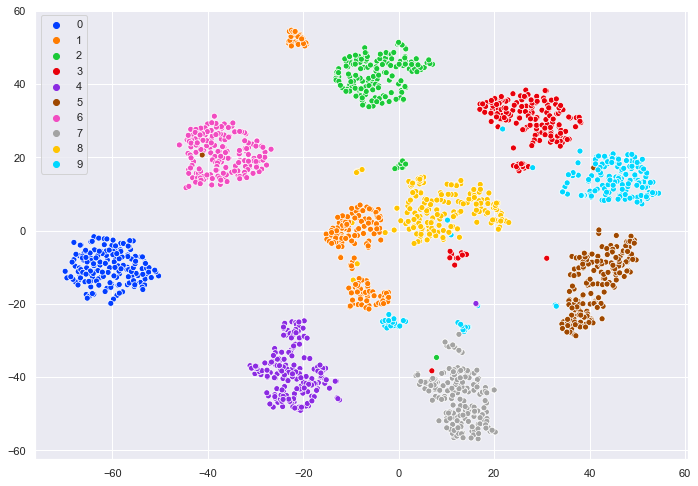

In [5]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

# Este dataset es muy conocido, se trata de MNIST.
# X corresponde a 1797 imagenes de 8x8 binarias con los trazos manuales de digitos.
# y por otro lado tiene el numero asociado para cada uno de los 1797
X, y = load_digits(return_X_y=True)

# tSNE es una tecnica de reduccion de la dimensionalidad (ver Everitt).  
# Al reducir y transformar las dimensiones, es una tecnica de clustering.
tsne = TSNE()
 
# Se asigna directamente el valor de X y se lo transforma a dos dimensiones.
X_embedded = tsne.fit_transform(X)

# Se usa seaborn para hacer el plot de los puntos.
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

plt.show()

# Clasificador de Mnist, con y sin t-SNE

In [2]:
# Horrible fix para evitar warnings causados por diferentes versiones de np y tensorflow
# https://github.com/tensorflow/tensorflow/issues/30427
import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist
from time import time
import numpy as np

seed = 19960614
np.random.seed(seed)

Using TensorFlow backend.


## Genero un árbol sin t-SNE

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Genero un arbol sin t-sne para comparar
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=seed)

# Hago un flatten porque el arbol me pide que sea de dimension 2
x_train = [np.concatenate(i) for i in x_train]
x_test = [np.concatenate(i) for i in x_test]

t0 = time()
dt.fit(x_train, y_train)
t1 = time()

print('Tiempo que tarda en entrenar el modelo: {} s'.format(round(t1-t0, 2)))

resultado_sin_tsne = dt.predict(x_test)

from sklearn.metrics import accuracy_score

print('Accuracy sin tsne: {}'.format(round(accuracy_score(y_test, resultado_sin_tsne) * 100, 2)))

Tiempo que tarda en entrenar el modelo: 23.12 s
Accuracy sin tsne: 88.01


## Genero un árbol utilizando t-SNE

Tiempo que tarda en convertir los datos: 5.48 s


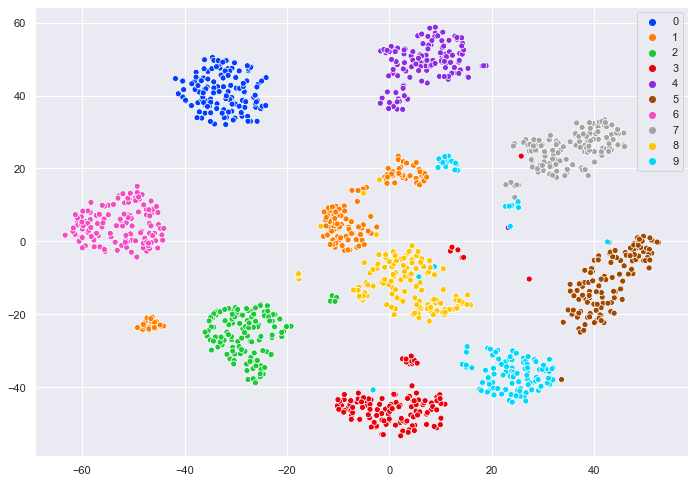

Tiempo que tarda en entrenar el modelo: -0.0 s
Accuracy con tsne: 98.22


In [9]:
X, y = load_digits(return_X_y=True)

from sklearn.manifold import TSNE
tsne = TSNE()

t0 = time()
tsned_images = tsne.fit_transform(X)
t1 = time()
print('Tiempo que tarda en convertir los datos: {} s'.format(round(t1-t0,2)))

# tsned_train y test, por ser un manifold, deberia de ser dimension 2 (al ser una representacion de un grafo)
dt = DecisionTreeClassifier(random_state=seed)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tsned_images, y)

sns.scatterplot(X_train[:,0], X_train[:,1], hue=y_train, legend='full', palette=palette)
plt.show()

t2 = time()
dt.fit(X_train, y_train)
t3 = time()

print('Tiempo que tarda en entrenar el modelo: {} s'.format(round(t2-t3,2)))

resultado_con_tsne = dt.predict(X_test)

print('Accuracy con tsne: {}'.format(round(accuracy_score(y_test, resultado_con_tsne) * 100, 2)))

## Mejora a t-SNE

Usando t-SNE, no solo tarde un tiempo mucho mayor, sino que el resultado obtenido es considerablemente peor.

Utilizando como guia: https://www.kaggle.com/carlolepelaars/97-on-mnist-with-a-single-decision-tree-t-sne

Previo a realizar el t-SNE, reduzco la dimensionalidad por medio de Truncated Singular Value Decomposition (TSVD).

Tiempo que tarda convertir los datos con tsvd: 0.06 s
Tiempo que tarda convertir los datos de tsvd con tsne: 5.59 s
Scatterplot de imagenes despues de la corrida tsvd y tsne


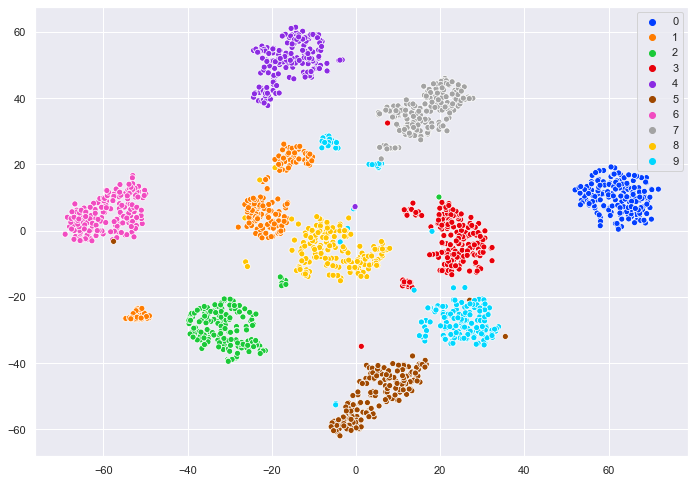

Tiempo que tarda en entrenar el modelo: 0.0 s
Accuracy con tsvd y tsne: 98.0


In [11]:
X, y = load_digits(return_X_y=True)

from sklearn.decomposition import TruncatedSVD

t0 = time()
tsvd_images = TruncatedSVD(n_components=50).fit_transform(X)
t1 = time()
print('Tiempo que tarda convertir los datos con tsvd: {} s'.format(round(t1-t0,2)))

from sklearn.manifold import TSNE
tsne = TSNE()

t2 = time()
tsvd_tsne_images = tsne.fit_transform(tsvd_images)
t3 = time()
print('Tiempo que tarda convertir los datos de tsvd con tsne: {} s'.format(round(t3-t2,2)))

print('Scatterplot de imagenes despues de la corrida tsvd y tsne')
sns.scatterplot(tsvd_tsne_images[:,0], tsvd_tsne_images[:,1], hue=y, legend='full', palette=palette)

plt.show()

dt = DecisionTreeClassifier(random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(tsvd_tsne_images, y)

t4 = time()
dt.fit(X_train, y_train)
t5 = time()

print('Tiempo que tarda en entrenar el modelo: {} s'.format(round(t5-t4,2)))

resultado_con_tsne = dt.predict(X_test)

print('Accuracy con tsvd y tsne: {}'.format(round(accuracy_score(y_test, resultado_con_tsne) * 100, 2)))